# Read The Prepared Data 

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [2]:
all_data = pd.read_pickle(r'./data/processed/all_data.pickle')

In [3]:
all_data.drop(columns=[
    'Area name',
    'Area type',
    'Specimen date',
    'LAD16NM'
], inplace=True)

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13623 entries, 0 to 13622
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Area code                            13623 non-null  object        
 1   Daily lab-confirmed cases            13622 non-null  float64       
 2   Cumulative lab-confirmed cases       13623 non-null  int64         
 3   Date                                 13623 non-null  datetime64[ns]
 4   rolling_mean_3                       13623 non-null  float64       
 5   rolling_mean_7                       13623 non-null  float64       
 6   grad_0                               13623 non-null  float64       
 7   grad_n3                              13623 non-null  float64       
 8   grad_n7                              13623 non-null  float64       
 9   current_r0                           13623 non-null  float64       
 10  previous_d

In [5]:
all_data.drop(columns=[
    'Cumulative lab-confirmed cases',
    'grad_n7',
    'previous_day_daily_cases',
    'rolling_r0_3',
    'K_value_2',
    'name',
    'AREAEHECT',
    'AREACHECT',
    'AREAIHECT'
], inplace=True)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13623 entries, 0 to 13622
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Area code                            13623 non-null  object        
 1   Daily lab-confirmed cases            13622 non-null  float64       
 2   Date                                 13623 non-null  datetime64[ns]
 3   rolling_mean_3                       13623 non-null  float64       
 4   rolling_mean_7                       13623 non-null  float64       
 5   grad_0                               13623 non-null  float64       
 6   grad_n3                              13623 non-null  float64       
 7   current_r0                           13623 non-null  float64       
 8   previous_day_cumulative_cases        13623 non-null  float64       
 9   rolling_r0_7                         12091 non-null  float64       
 10  rolling_pr

In [7]:
all_data.dropna(inplace=True)

# Predict Daily New Cases

## XGRegressor (Shuffled Split Validation Data) 

In [8]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
X = all_data.drop(columns=['Date', 'Daily lab-confirmed cases'])

In [11]:
y = all_data['Daily lab-confirmed cases']

In [12]:
ordinal_encoder = OrdinalEncoder()

In [13]:
X = ordinal_encoder.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
xg_regressor = XGBRegressor()

In [16]:
xg_regressor.fit(X_train, y_train, early_stopping_rounds=2, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:10.47390
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:8.41127
[2]	validation_0-rmse:7.07498
[3]	validation_0-rmse:6.35493
[4]	validation_0-rmse:5.84340
[5]	validation_0-rmse:5.56473
[6]	validation_0-rmse:5.37894
[7]	validation_0-rmse:5.26462
[8]	validation_0-rmse:5.20235
[9]	validation_0-rmse:5.16157
[10]	validation_0-rmse:5.13822
[11]	validation_0-rmse:5.12162
[12]	validation_0-rmse:5.10562
[13]	validation_0-rmse:5.07595
[14]	validation_0-rmse:5.04130
[15]	validation_0-rmse:5.00775
[16]	validation_0-rmse:4.98538
[17]	validation_0-rmse:4.97324
[18]	validation_0-rmse:4.95682
[19]	validation_0-rmse:4.94491
[20]	validation_0-rmse:4.95413
[21]	validation_0-rmse:4.95334
Stopping. Best iteration:
[19]	validation_0-rmse:4.94491



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

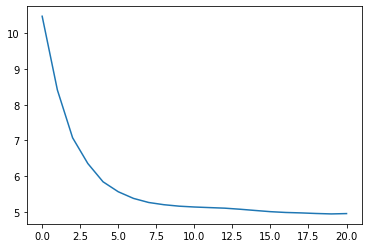

In [17]:
plt.plot(xg_regressor.evals_result()['validation_0']['rmse'])
plt.show()

In [18]:
y_pred = xg_regressor.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean()

0.5208568672617345

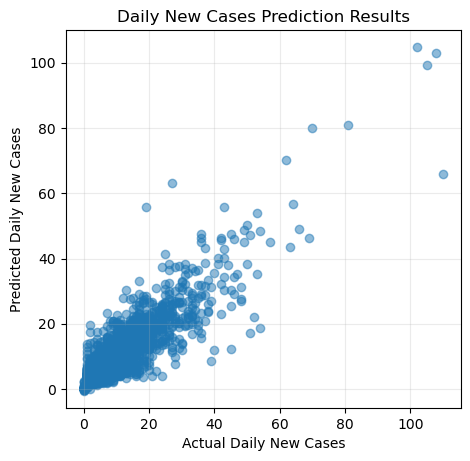

In [21]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
ax.scatter(y_test, y_pred, alpha=0.5)
ax.set_aspect('equal')
plt.title('Daily New Cases Prediction Results')
plt.xlabel('Actual Daily New Cases')
plt.ylabel('Predicted Daily New Cases')
plt.grid(which='both', alpha=0.25)
plt.show()

In [23]:
joblib.dump(xg_regressor,'./data/models/xgregressor_dailycases.joblib')

['./data/models/xgregressor_dailycases.joblib']